In [4]:
import pandas as pd

customer_df = pd.read_csv('C:/Users/Govin Nagore/Documents/Customer.csv')
prod_cat_info_df = pd.read_csv('C:/Users/Govin Nagore/Documents/prod_cat_info.csv')
transactions_df = pd.read_csv('C:/Users/Govin Nagore/Documents/Transactions.csv')

customer_transactions = pd.merge(
    transactions_df, customer_df,
    left_on='cust_id', right_on='customer_Id',
    how='left'
)

final_combined_df = pd.merge(
    customer_transactions, prod_cat_info_df,
    on=['prod_cat_code', 'prod_subcat_code'],
    how='left'
)

final_combined_df.to_csv("C:/Users/Govin Nagore/Documents/Combined_Data.csv", index=False)

print("Successfully combined and saved the data as 'Combined_Data.csv'")


Successfully combined and saved the data as 'Combined_Data.csv'


In [6]:
combined_data=pd.read_csv('C:/Users/Govin Nagore/Documents/Combined_Data.csv')
combined_data.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28/02/2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,Women
1,29258453508,270384,27/02/2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,Computers
2,51750724947,273420,24/02/2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,DIY
3,93274880719,271509,24/02/2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0,Home and kitchen,Bath
4,51750724947,273420,23/02/2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,DIY


In [15]:
combined_data.shape

(23053, 16)

In [16]:
missing_values = combined_data.isnull().sum()
print(missing_values)

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
customer_Id         0
DOB                 0
Gender              9
city_code           8
prod_cat            0
prod_subcat         0
dtype: int64


In [17]:
missing_rows = combined_data[combined_data.isnull().any(axis=1)]
print(missing_rows)

       transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  \
1776      85496594077   267199  27/11/2013                 1              1   
1833      85496594077   267199  24/11/2013                 1              1   
3711      81458995048   268447  26/08/2013                10              5   
3852      38169306418   268709  18/08/2013                 5              3   
3907       5723163001   267199  15/08/2013                 6              5   
6049      50093131361   268447  03/05/2013                 9              3   
6916      55955314599   271626  20/03/2013                11              6   
8534      86339422638   268447  31/12/2012                 1              4   
8761      51951874983   271626  20/12/2012                10              5   
12376     78371516927   271626  29/06/2012                11              5   
12802     42776379061   268447  05/06/2012                 2              6   
12810     24340761293   271626  05/06/2012          

In [21]:
mode_gender = combined_data['Gender'].mode().iloc[0]
mode_city = combined_data['city_code'].mode().iloc[0]
print(mode_gender)
print(mode_city)

M
4.0


In [26]:
combined_data['Gender'] = combined_data['Gender'].fillna('M')
combined_data['city_code'] = combined_data['city_code'].fillna(4)

combined_data.to_csv("C:/Users/Govin Nagore/Documents/Cleaned_Data.csv", index=False)

print("done")

done


In [27]:
missing_values = combined_data.isnull().sum()
print(missing_values)

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
customer_Id         0
DOB                 0
Gender              0
city_code           0
prod_cat            0
prod_subcat         0
dtype: int64


In [29]:
negative_row=combined_data[combined_data['total_amt'] < 0]
print(negative_row)

       transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  \
0         80712190438   270351  28/02/2014                 1              1   
1         29258453508   270384  27/02/2014                 5              3   
2         51750724947   273420  24/02/2014                 6              5   
3         93274880719   271509  24/02/2014                11              6   
4         51750724947   273420  23/02/2014                 6              5   
...               ...      ...         ...               ...            ...   
22919     42161597232   267094  31/01/2011                 3              1   
22926     72870271171   270911  31/01/2011                11              5   
22929     90114483354   268097  31/01/2011                10              5   
22977     99568595128   273973  29/01/2011                 4              2   
23007     71176929896   269201  27/01/2011                 8              3   

       Qty  Rate      Tax  total_amt      Store_typ

In [31]:
combined_data['Qty'] = combined_data['Qty'].abs()
combined_data['Rate'] = combined_data['Rate'].abs()
combined_data['total_amt'] = combined_data['total_amt'].abs()
print("done")

done


In [34]:
negative_row=combined_data[combined_data['total_amt'] < 0]
print(negative_row)

Empty DataFrame
Columns: [transaction_id, cust_id, tran_date, prod_subcat_code, prod_cat_code, Qty, Rate, Tax, total_amt, Store_type, customer_Id, DOB, Gender, city_code, prod_cat, prod_subcat]
Index: []


In [35]:
duplicated_data = combined_data[combined_data.duplicated()]
print(duplicated_data)

       transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  \
3237      63833750229   269016  19/09/2013                10              6   
4513      54818572958   274656  19/07/2013                11              6   
9748      93088859112   272584  04/11/2012                 1              2   
10016     48727689115   270330  21/10/2012                 4              3   
10785     95523406151   273937  16/09/2012                 8              3   
11251     42255136382   270202  25/08/2012                12              5   
12967       426787191   273106  28/05/2012                 1              2   
13713     68625357665   270229  24/04/2012                12              6   
13770     84298959416   268663  22/04/2012                 3              5   
16269      4170892941   266852  21/12/2011                 8              3   
16315     44125492691   274748  19/12/2011                 3              2   
19869     43292728137   267939  03/07/2011          

In [36]:
duplicates = combined_data.duplicated(keep=False)
combined_data = combined_data[~duplicates]
print("Done")

Done


In [38]:
combined_data.to_csv("C:/Users/Govin Nagore/Documents/Cleaned_Data.csv", index=False)
print("Done")

Done


In [43]:
import numpy as np

Q1 = combined_data['total_amt'].quantile(0.25)
Q3 = combined_data['total_amt'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")


lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


Q1: 1034.28
Q3: 3849.82
IQR: 2815.54
Lower Bound: -3189.0299999999997
Upper Bound: 8073.129999999999


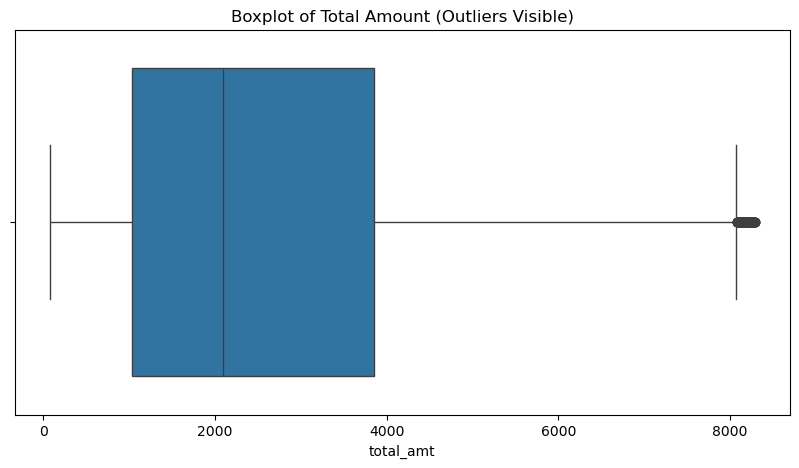

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x=combined_data['total_amt'])
plt.title("Boxplot of Total Amount (Outliers Visible)")
plt.show()

In [55]:
outliers = combined_data[(combined_data['total_amt'] < lower_bound) | (combined_data['total_amt'] > upper_bound)]
print(outliers)

       transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  \
1         29258453508   270384  27/02/2014                 5              3   
10        29258453508   270384  20/02/2014                 5              3   
279       57234040200   272816  06/02/2014                 7              5   
360       23061342609   267265  02/02/2014                 2              6   
383       16390149843   274799  31/01/2014                12              6   
...               ...      ...         ...               ...            ...   
21828     39370632665   272054  25/03/2011                 4              4   
21841     77290177333   268481  25/03/2011                 4              4   
22381      2708053215   269652  26/02/2011                 7              5   
22633     80216773693   273521  15/02/2011                12              6   
22835       536918883   269570  04/02/2011                 9              3   

       Qty  Rate      Tax  total_amt Store_type  cu

In [56]:
combined_data = combined_data[(combined_data['total_amt'] >= lower_bound) & (combined_data['total_amt'] <= upper_bound)]

In [57]:
combined_data.to_csv("C:/Users/Govin Nagore/Documents/Cleaned_Data.csv", index=False)
print("Done")

Done


In [58]:
outliers = combined_data[(combined_data['total_amt'] < lower_bound) | (combined_data['total_amt'] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [transaction_id, cust_id, tran_date, prod_subcat_code, prod_cat_code, Qty, Rate, Tax, total_amt, Store_type, customer_Id, DOB, Gender, city_code, prod_cat, prod_subcat]
Index: []


In [63]:
import pandas as pd

combined_data['DOB'] = pd.to_datetime(combined_data['DOB'], errors='coerce', dayfirst=True)
combined_data['tran_date'] = pd.to_datetime(combined_data['tran_date'], errors='coerce', dayfirst=True)

combined_data['Age'] = (combined_data['tran_date'] - combined_data['DOB']).dt.days // 365

print("done")

done


In [64]:
combined_data.to_csv("C:/Users/Govin Nagore/Documents/Cleaned_Data.csv", index=False)
print("Done")

Done


In [65]:
combined_data = combined_data.drop(columns=['DOB'])
combined_data.to_csv("C:/Users/Govin Nagore/Documents/Cleaned_Data.csv", index=False)
print("Done")

Done


In [66]:
combined_data['tran_date'] = combined_data['tran_date'].dt.strftime('%B %Y')
print("done")

done


In [67]:
combined_data.to_csv("C:/Users/Govin Nagore/Documents/Cleaned_Data.csv", index=False)
print("Done")

Done


In [89]:
new_data=pd.read_csv('C:/Users/Govin Nagore/Documents/Cleaned_Data.csv')
new_data.head()

,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,Gender,city_code,prod_cat,prod_subcat,Age
0,80712190438,February 2014,1,1,5,772,405.300,4265.300,e-Shop,270351,M,5.0,Clothing,Women,32
1,51750724947,February 2014,6,5,2,791,166.110,1748.110,TeleShop,273420,M,8.0,Books,DIY,21
2,93274880719,February 2014,11,6,3,1363,429.345,4518.345,e-Shop,271509,M,3.0,Home and kitchen,Bath,32
3,51750724947,February 2014,6,5,2,791,166.110,1748.110,TeleShop,273420,M,8.0,Books,DIY,21
4,97439039119,February 2014,8,3,2,824,173.040,1821.040,TeleShop,272357,F,6.0,Electronics,Personal Appliances,31


In [91]:
new_data_remove = new_data.drop(columns=['transaction_id', 'prod_subcat_code', 'prod_cat_code', 'customer_Id'])
combined_data.to_csv(C, index=False)
print("Done")

Done


In [92]:
new_data_remove.head()

,tran_date,Qty,Rate,Tax,total_amt,Store_type,Gender,city_code,prod_cat,prod_subcat,Age
0,February 2014,5,772,405.300,4265.300,e-Shop,M,5.0,Clothing,Women,32
1,February 2014,2,791,166.110,1748.110,TeleShop,M,8.0,Books,DIY,21
2,February 2014,3,1363,429.345,4518.345,e-Shop,M,3.0,Home and kitchen,Bath,32
3,February 2014,2,791,166.110,1748.110,TeleShop,M,8.0,Books,DIY,21
4,February 2014,2,824,173.040,1821.040,TeleShop,F,6.0,Electronics,Personal Appliances,31


In [100]:
import pandas as np
import numpy as np
import scipy.stats as stats

data_cleaned= pd.read_csv('C:/Users/Govin Nagore/Documents/Cleaned_Data.csv')
data = data_cleaned['total_amt']

# Perform the Shapiro-Wilk test
stat, p_value = stats.shapiro(data)

# Output the results
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis: Data appears to be normally distributed.")
else:
    print("Reject the null hypothesis: Data does not appear to be normally distributed.")


Shapiro-Wilk Test Statistic: 0.9148
P-Value: 0.0000
Reject the null hypothesis: Data does not appear to be normally distributed.


C:\Users\Govin Nagore\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 22893.
  res = hypotest_fun_out(*samples, **kwds)


In [101]:
import pandas as pd
import numpy as np
import scipy.stats as stats

data_cleaned = pd.read_csv('C:/Users/Govin Nagore/Documents/Cleaned_Data.csv')
data = data_cleaned['total_amt']

result = stats.anderson(data, dist='norm')

print(f"Anderson-Darling Test Statistic: {result.statistic:.4f}")
for i, significance_level in enumerate(result.significance_level):
    print(f"Significance Level {significance_level}%: {result.critical_values[i]}")

alpha = 0.05
if result.statistic < result.critical_values[2]:
    print("Fail to reject the null hypothesis: Data appears to be normally distributed.")
else:
    print("Reject the null hypothesis: Data does not appear to be normally distributed.")

Anderson-Darling Test Statistic: 600.0263
Significance Level 15.0%: 0.576
Significance Level 10.0%: 0.656
Significance Level 5.0%: 0.787
Significance Level 2.5%: 0.918
Significance Level 1.0%: 1.092
Reject the null hypothesis: Data does not appear to be normally distributed.


In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats

data_cleaned = pd.read_csv('C:/Users/Govin Nagore/Documents/Cleaned_Data.csv')
data = data_cleaned['Rate']

result = stats.anderson(data, dist='norm')

print(f"Anderson-Darling Test Statistic: {result.statistic:.4f}")
for i, significance_level in enumerate(result.significance_level):
    print(f"Significance Level {significance_level}%: {result.critical_values[i]}")

alpha = 0.05
if result.statistic < result.critical_values[2]:
    print("Fail to reject the null hypothesis: Data appears to be normally distributed.")
else:
    print("Reject the null hypothesis: Data does not appear to be normally distributed.")


import pandas as pd
import numpy as np
import scipy.stats as stats

data_cleaned = pd.read_csv('C:/Users/Govin Nagore/Documents/Cleaned_Data.csv')
data = data_cleaned['Tax']

result = stats.anderson(data, dist='norm')

print(f"Anderson-Darling Test Statistic: {result.statistic:.4f}")
for i, significance_level in enumerate(result.significance_level):
    print(f"Significance Level {significance_level}%: {result.critical_values[i]}")

alpha = 0.05
if result.statistic < result.critical_values[2]:
    print("Fail to reject the null hypothesis: Data appears to be normally distributed.")
else:
    print("Reject the null hypothesis: Data does not appear to be normally distributed.")

Anderson-Darling Test Statistic: 263.4360
Significance Level 15.0%: 0.576
Significance Level 10.0%: 0.656
Significance Level 5.0%: 0.787
Significance Level 2.5%: 0.918
Significance Level 1.0%: 1.092
Reject the null hypothesis: Data does not appear to be normally distributed.
Anderson-Darling Test Statistic: 600.0263
Significance Level 15.0%: 0.576
Significance Level 10.0%: 0.656
Significance Level 5.0%: 0.787
Significance Level 2.5%: 0.918
Significance Level 1.0%: 1.092
Reject the null hypothesis: Data does not appear to be normally distributed.


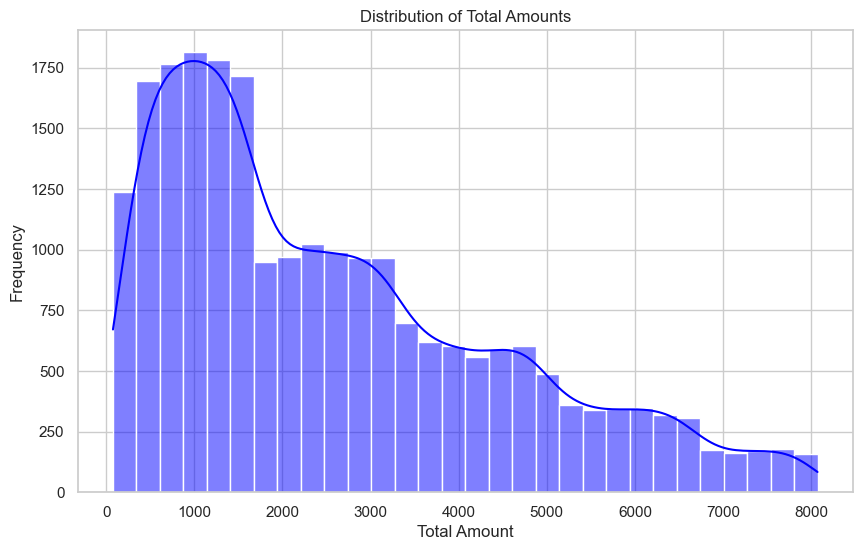

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_cleaned = pd.read_csv('C:/Users/Govin Nagore/Documents/Cleaned_Data.csv')
data = data_cleaned['total_amt']


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, bins=30, color='blue')

plt.title('Distribution of Total Amounts')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')

plt.show()

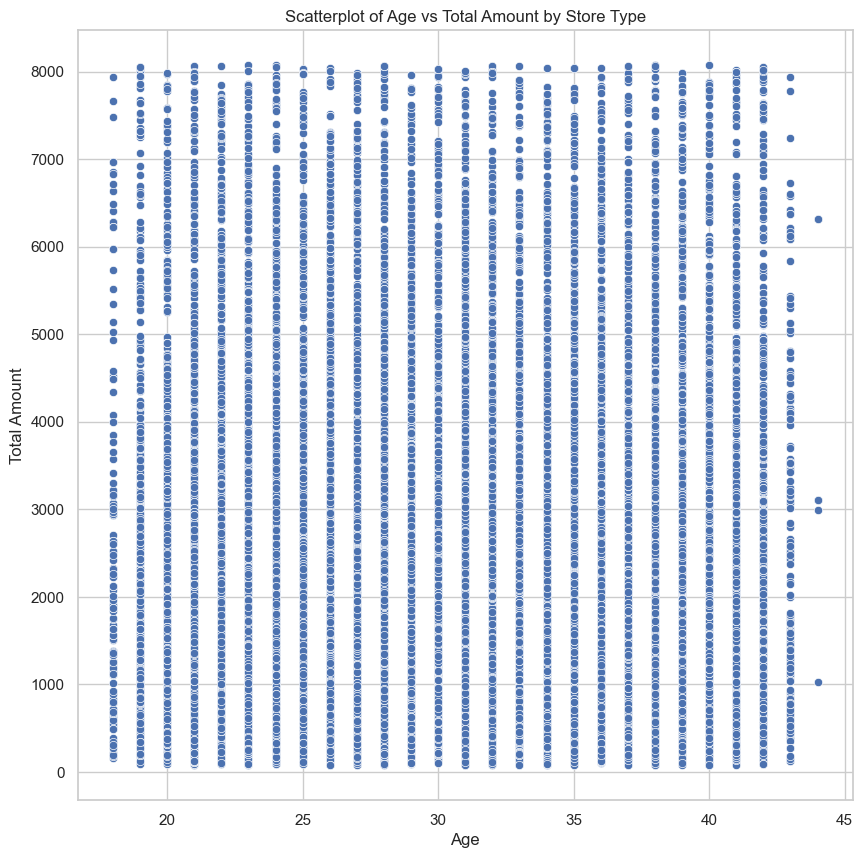

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_cleaned = pd.read_csv('C:/Users/Govin Nagore/Documents/Cleaned_Data.csv')


plt.figure(figsize=(10, 10))
sns.scatterplot(x='Age', y='total_amt', data=data_cleaned,)

plt.title('Scatterplot of Age vs Total Amount by Store Type')
plt.xlabel('Age')
plt.ylabel('Total Amount')

plt.show()

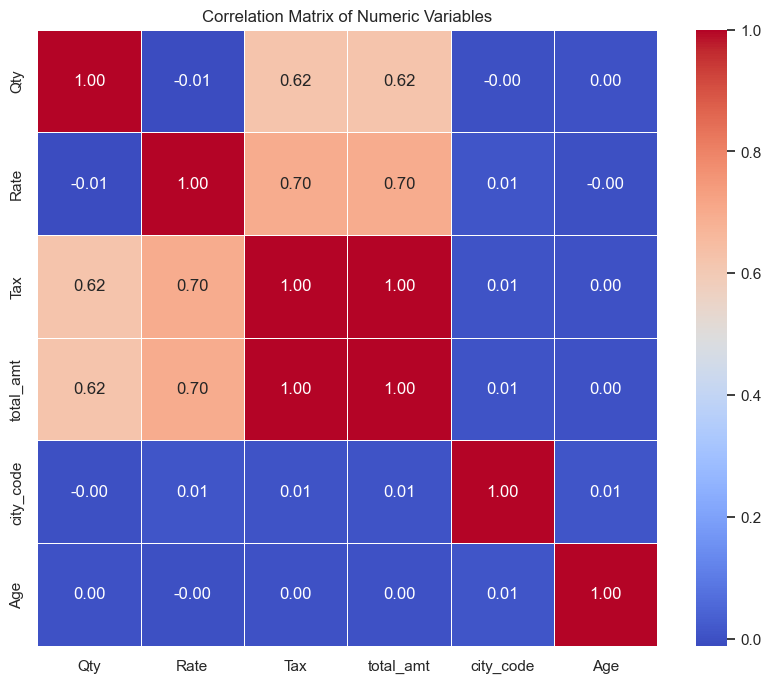

In [113]:
# Keep only numeric columns for correlation
data_numeric = data_cleaned.select_dtypes(include=[float, int])

# Compute the correlation matrix for numeric columns
correlation_matrix = data_numeric.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add titles and labels
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_cleaned = pd.read_csv('C:/Users/Govin Nagore/Documents/Cleaned_Data.csv')

In [116]:
data_cleaned.describe()

,Qty,Rate,Tax,total_amt,city_code,Age
count,22893.000000,22893.000000,22893.000000,22893.000000,22893.000000,22893.000000
mean,2.995064,783.142707,245.592092,2584.564398,5.483903,30.594767
std,1.416288,413.574512,183.306882,1929.086714,2.863480,6.697965
min,1.000000,70.000000,7.350000,77.350000,1.000000,18.000000
25%,2.000000,424.000000,97.650000,1027.650000,3.000000,25.000000
50%,3.000000,787.000000,197.505000,2078.505000,5.000000,31.000000
75%,4.000000,1144.000000,361.200000,3801.200000,8.000000,36.000000
max,5.000000,1500.000000,767.025000,8072.025000,10.000000,44.000000


In [121]:
import pandas as pd

data_cleaned = pd.read_csv('C:/Users/Govin Nagore/Documents/Cleaned_Data.csv')

categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"Frequency Distribution for {column}:")
    print(data_cleaned[column].value_counts())
    print("\n")

Frequency Distribution for tran_date:
tran_date
January 2014      679
October 2013      669
September 2011    665
October 2012      664
March 2013        662
July 2011         661
April 2012        656
May 2012          655
August 2013       654
November 2012     652
March 2011        644
September 2013    634
October 2011      632
November 2011     630
August 2011       630
March 2012        629
December 2012     627
December 2013     627
December 2011     620
August 2012       617
September 2012    616
July 2013         616
May 2013          612
April 2011        607
June 2013         606
January 2013      605
February 2012     603
July 2012         603
January 2012      599
November 2013     589
April 2013        588
May 2011          583
June 2011         574
June 2012         566
February 2011     560
February 2013     539
February 2014     379
January 2011      141
Name: count, dtype: int64


Frequency Distribution for Store_type:
Store_type
e-Shop            9238
MBR            

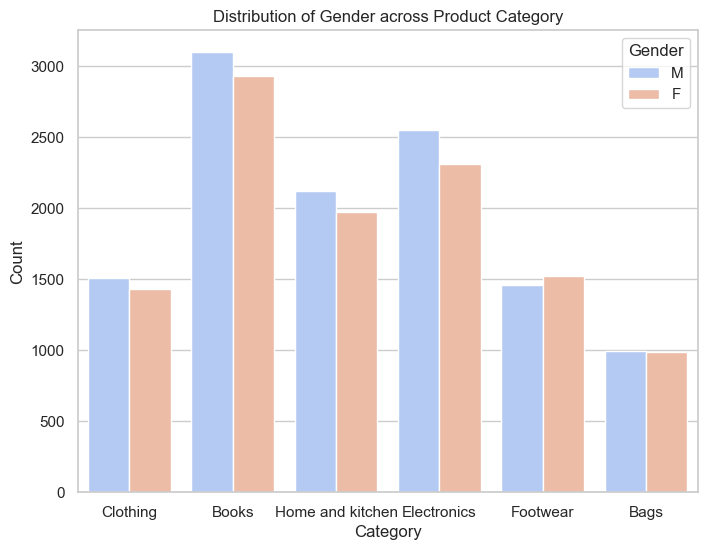

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_cleaned = pd.read_csv('C:/Users/Govin Nagore/Documents/Cleaned_Data.csv')

plt.figure(figsize=(8, 6))
sns.countplot(data=data_cleaned, x='prod_cat', hue='Gender', palette='coolwarm')


plt.title('Distribution of Gender across Product Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Gender')

plt.show()

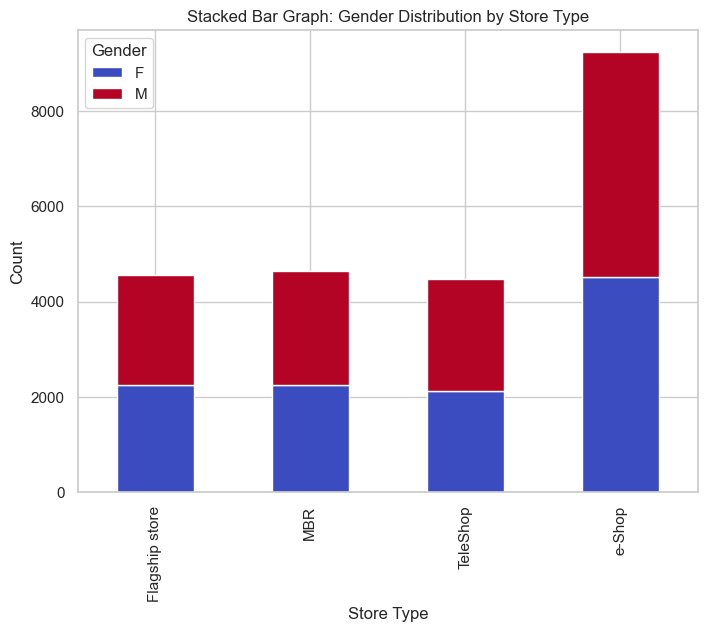

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

data_cleaned = pd.read_csv('C:/Users/Govin Nagore/Documents/Cleaned_Data.csv')

stacked_data = pd.crosstab(data_cleaned['Store_type'], data_cleaned['Gender'])

stacked_data.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='coolwarm')

plt.title('Stacked Bar Graph: Gender Distribution by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.legend(title='Gender')

plt.show()


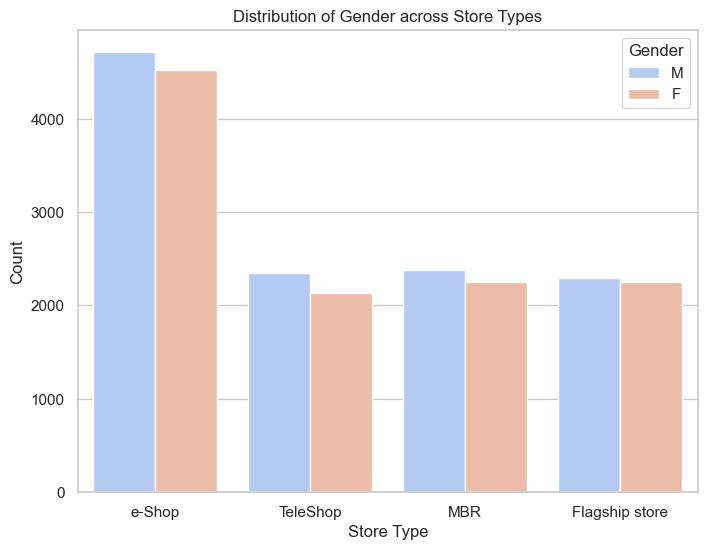

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
data_cleaned = pd.read_csv('C:/Users/Govin Nagore/Documents/Cleaned_Data.csv')

# Create a count plot between gender and store type
plt.figure(figsize=(8, 6))
sns.countplot(data=data_cleaned, x='Store_type', hue='Gender', palette='coolwarm')

# Add title and labels
plt.title('Distribution of Gender across Store Types')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.legend(title='Gender')

# Show the plot
plt.show()

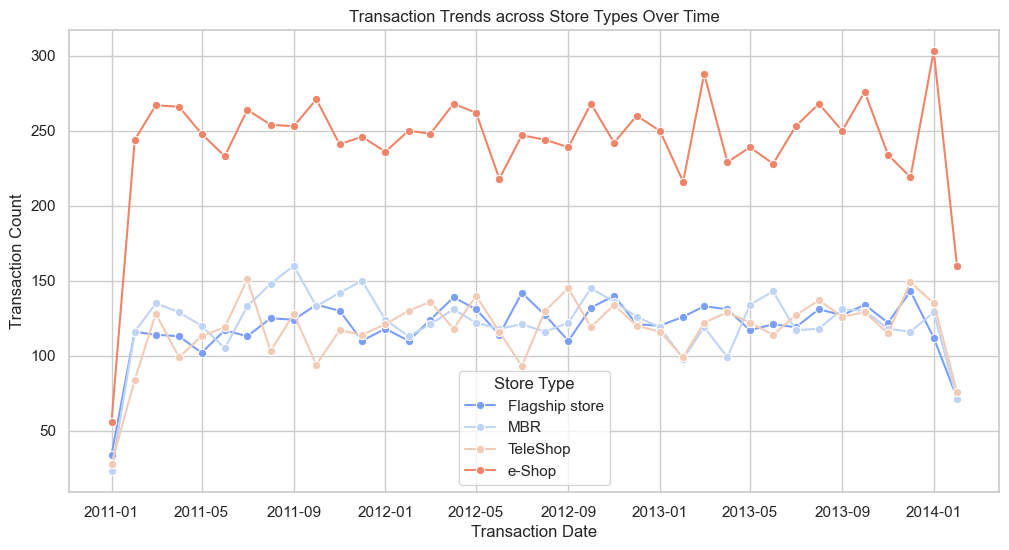

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_cleaned = pd.read_csv('C:/Users/Govin Nagore/Documents/Cleaned_Data.csv')

transaction_counts = data_cleaned.groupby(['tran_date', 'Store_type']).size().reset_index(name='count')

def clean_date_format(date_str):
    try:
        return pd.to_datetime(date_str, format='%B %Y')
    except ValueError:
        return pd.to_datetime(date_str, errors='coerce')

transaction_counts['tran_date'] = transaction_counts['tran_date'].apply(clean_date_format)


plt.figure(figsize=(12, 6))
sns.lineplot(data=transaction_counts, x='tran_date', y='count', hue='Store_type', marker='o', palette='coolwarm')

plt.title('Transaction Trends across Store Types Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Transaction Count')
plt.legend(title='Store Type')

plt.show()

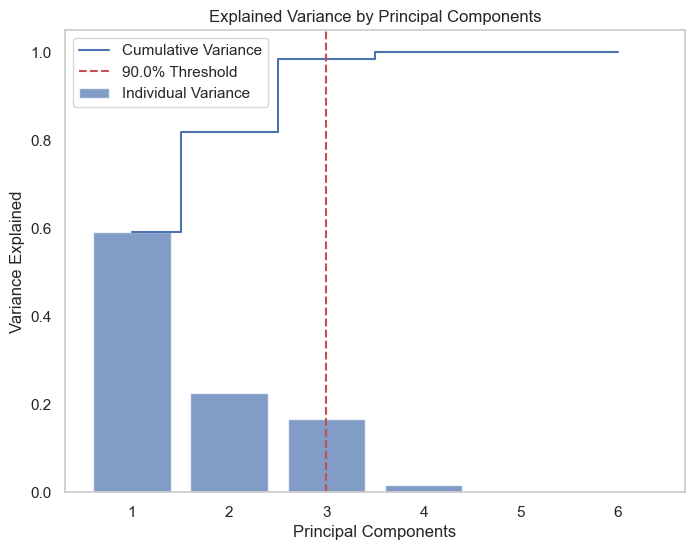


Number of Principal Components Selected (Explaining 90.0% Variance): 3
PCA Transformed Data (First 5 Rows):
   Principal Component 1  Principal Component 2  Principal Component 3
0               1.212689               1.432680               0.192749
1              -0.598314              -0.731709              -1.423913
2               2.307110              -0.783595               0.218170
3              -0.598314              -0.731709              -1.423913
4              -0.486283              -0.767128               0.069556

Explained Variance Ratio:
Principal Component 1: 59.21%
Principal Component 2: 22.57%
Principal Component 3: 16.67%
Principal Component 4: 1.55%
Principal Component 5: 0.00%
Principal Component 6: 0.00%


In [144]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
file_path = 'C:/Users/Govin Nagore/Documents/Cleaned_Data.csv'
data = pd.read_csv(file_path)

# Selecting numerical columns for PCA
numerical_columns = ['Qty', 'Rate', 'Tax', 'total_amt', 'Rate', 'Age']
numerical_data = data[numerical_columns]

# Step 1: Standardizing the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical_data)

# Step 2: Applying PCA
pca = PCA()
pca_transformed_data = pca.fit_transform(standardized_data)

# Step 3: Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Step 4: Define a threshold for explained variance (e.g., 90%)
threshold = 0.90
n_components = next(i for i, total_var in enumerate(cumulative_variance) if total_var >= threshold) + 1

# Step 5: Creating a DataFrame for the selected PCA-transformed data
pca_df = pd.DataFrame(
    pca_transformed_data[:, :n_components],
    columns=[f"Principal Component {i+1}" for i in range(n_components)]
)

# Step 6: Plotting Explained Variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Individual Variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative Variance')
plt.axvline(x=n_components, color='r', linestyle='--', label=f'{threshold*100}% Threshold')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid()
plt.show()

# Displaying the transformed data and explained variance
print(f"\nNumber of Principal Components Selected (Explaining {threshold*100}% Variance): {n_components}")
print("PCA Transformed Data (First 5 Rows):")
print(pca_df.head())

print("\nExplained Variance Ratio:") 
for i, var in enumerate(explained_variance_ratio, 1):
    print(f"Principal Component {i}: {var:.2%}")

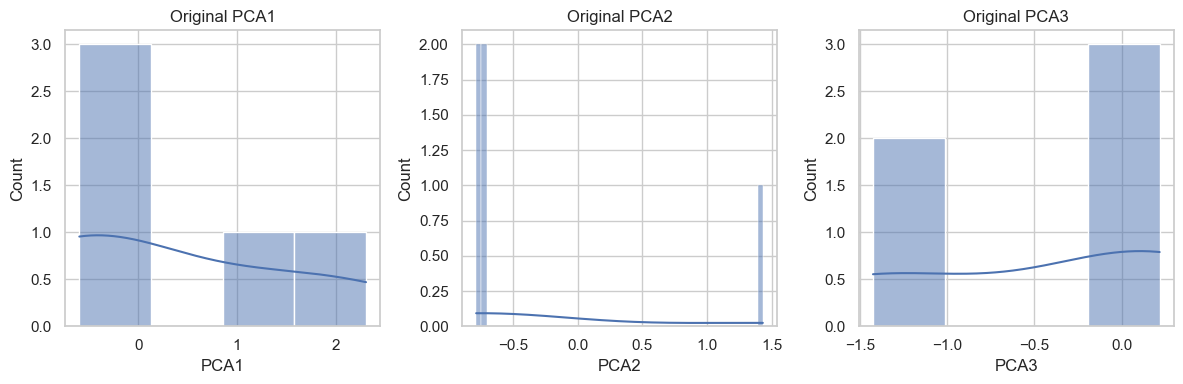

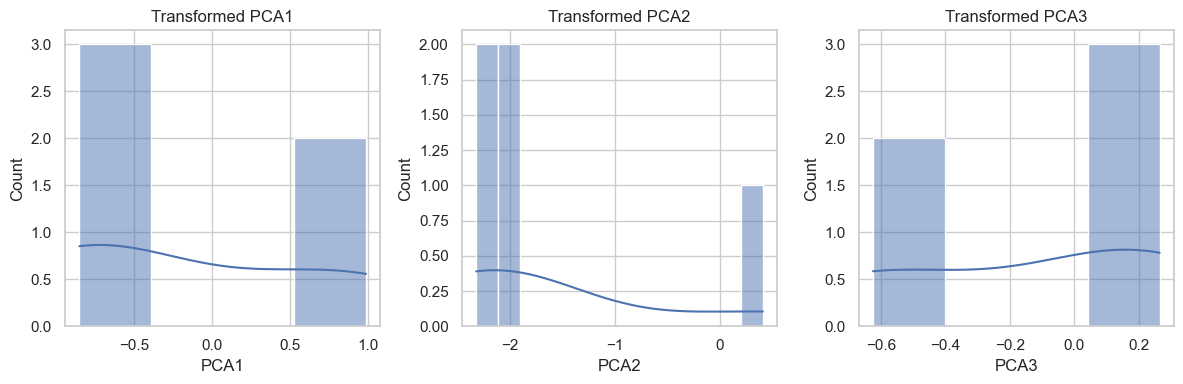

Shapiro-Wilk test for PCA1: Statistics=0.785, p-value=0.060
Shapiro-Wilk test for PCA2: Statistics=0.652, p-value=0.003
Shapiro-Wilk test for PCA3: Statistics=0.779, p-value=0.054


In [146]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox, yeojohnson
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (Replace with your PCA-transformed data)
data = pd.DataFrame({
    'PCA1': [1.212689, -0.598314, 2.307110, -0.598314 , -0.486283],
    'PCA2': [1.432680, -0.731709, -0.783595, -0.731709, -0.767128],
    'PCA3': [0.192749, -1.423913, 0.218170, -1.423913, 0.069556]
})

# Visualize original distribution
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, col in enumerate(data.columns):
    sns.histplot(data[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Original {col}')
plt.tight_layout()
plt.show()

# Apply Yeo-Johnson transformation (since it handles negative values)
data_transformed = data.copy()
for col in data.columns:
    data_transformed[col], _ = yeojohnson(data[col])

# Visualize transformed data
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, col in enumerate(data_transformed.columns):
    sns.histplot(data_transformed[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Transformed {col}')
plt.tight_layout()
plt.show()

# Check normality using Shapiro-Wilk test
from scipy.stats import shapiro
for col in data_transformed.columns:
    stat, p = shapiro(data_transformed[col])
    print(f'Shapiro-Wilk test for {col}: Statistics={stat:.3f}, p-value={p:.3f}')

In [12]:
print(type(data))
print(data.head())

<class 'pandas.core.series.Series'>
0    405.300
1    166.110
2    429.345
3    166.110
4    173.040
Name: Tax, dtype: float64


In [13]:
data = data.to_frame()

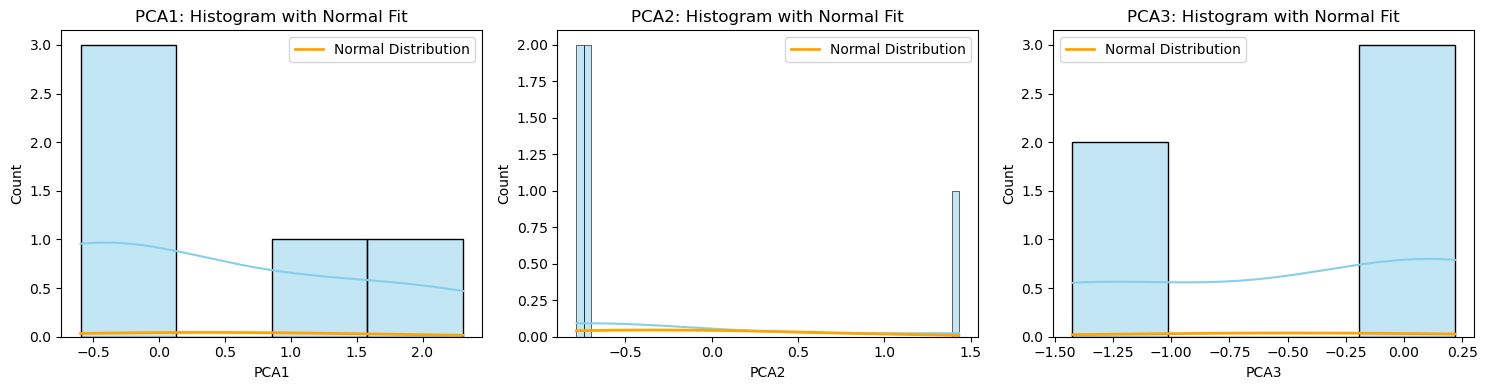


Shapiro-Wilk Test Results:
PCA1: Statistics=0.793, p-value=0.071 => Normal
PCA2: Statistics=0.574, p-value=0.000 => Not Normal
PCA3: Statistics=0.726, p-value=0.018 => Not Normal


In [16]:
import numpy as np
import pandas as pd
from scipy.stats import norm, shapiro
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the PCA dataset is restored
data = pd.DataFrame({
    'PCA1': [1.212689, -0.598314, 2.307110, -0.598314 , -0.486283],
    'PCA2': [1.432680, -0.731709, -0.783595, -0.731709, -0.767128],
    'PCA3': [0.192749, -1.423913, 0.218170, -1.423913, 0.069556]
})

# Plot histograms for all PCA components with normal curves
fig, axes = plt.subplots(1, len(data.columns), figsize=(15, 4))

for i, col in enumerate(data.columns):
    sns.histplot(data[col], ax=axes[i], kde=True, color='skyblue')
    
    # Overlay normal distribution curve
    mean, std = data[col].mean(), data[col].std()
    x_vals = np.linspace(data[col].min(), data[col].max(), 100)
    axes[i].plot(
        x_vals,
        norm.pdf(x_vals, mean, std) * len(data[col]) * (x_vals[1] - x_vals[0]),
        color='orange', lw=2, label="Normal Distribution"
    )
    axes[i].legend()
    axes[i].set_title(f'{col}: Histogram with Normal Fit')

plt.tight_layout()
plt.show()

# Shapiro-Wilk Test Results
print("\nShapiro-Wilk Test Results:")
for col in data.columns:
    stat, p = shapiro(data[col])
    result = "Normal" if p > 0.05 else "Not Normal"
    print(f'{col}: Statistics={stat:.3f}, p-value={p:.3f} => {result}')


Shapiro-Wilk Test for Box-Cox: ShapiroResult(statistic=0.7272159349775655, pvalue=0.01805883514986664)
Shapiro-Wilk Test for Reciprocal: ShapiroResult(statistic=0.5905758263617435, pvalue=0.0004672897762065482)
Square Root transformation cannot be applied due to negative values.


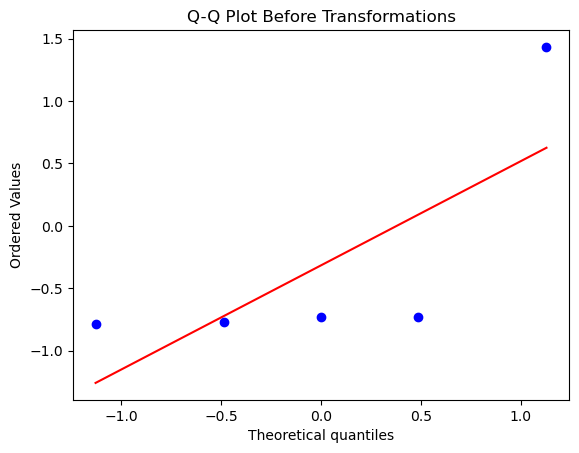

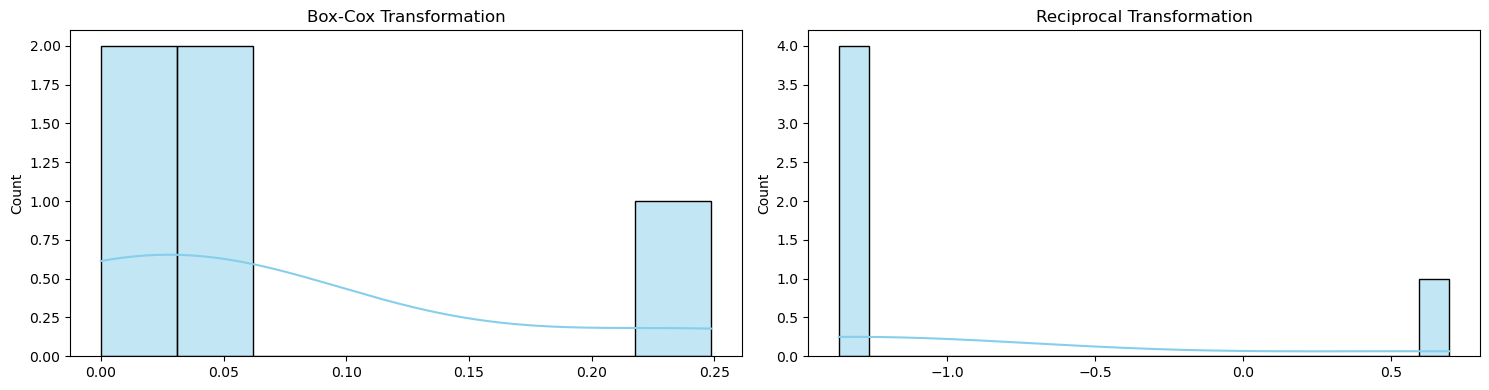

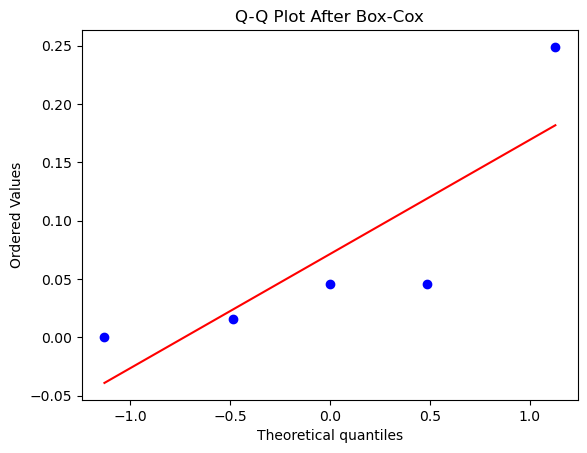

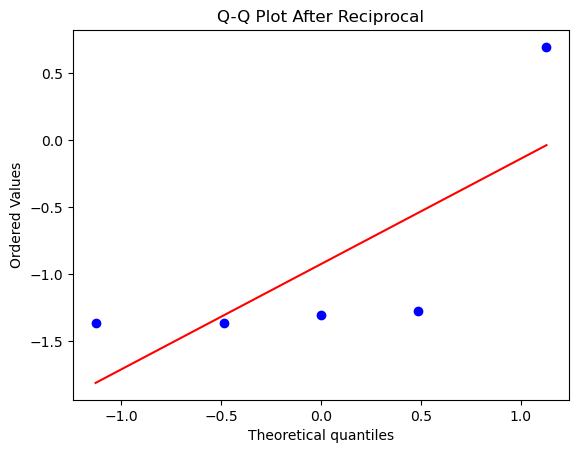

In [22]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox, shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Example PC2 data
pc2 = np.array([1.432680, -0.731709, -0.783595, -0.731709, -0.767128])  

# Create a dictionary to store transformations
transformed_data = {}

# Adjust data for Box-Cox (shift all values to be positive if needed)
shifted_pc2 = pc2 - np.min(pc2) + 1  # Shift to ensure all values are positive

# 1. Box-Cox Transformation (only for positive values)
if np.all(shifted_pc2 > 0):
    pc2_boxcox, _ = boxcox(shifted_pc2)
    transformed_data["Box-Cox"] = pc2_boxcox
    print("Shapiro-Wilk Test for Box-Cox:", shapiro(pc2_boxcox))
else:
    print("Box-Cox transformation cannot be applied due to negative or zero values.")

# 2. Reciprocal Transformation (only for nonzero values)
if np.all(pc2 != 0):
    pc2_reciprocal = 1 / pc2
    transformed_data["Reciprocal"] = pc2_reciprocal
    print("Shapiro-Wilk Test for Reciprocal:", shapiro(pc2_reciprocal))
else:
    print("Reciprocal transformation cannot be applied due to zero values.")

# 3. Square Root Transformation (for non-negative values)
if np.all(pc2 >= 0):
    pc2_sqrt = np.sqrt(pc2)
    transformed_data["Square Root"] = pc2_sqrt
    print("Shapiro-Wilk Test for Square Root:", shapiro(pc2_sqrt))
else:
    print("Square Root transformation cannot be applied due to negative values.")

# Function to plot Q-Q plot
def qq_plot(data, title):
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(title)
    plt.show()

# Plot Q-Q plot before transformations
qq_plot(pc2, "Q-Q Plot Before Transformations")

# Plot the histograms for each transformation
fig, axes = plt.subplots(1, len(transformed_data), figsize=(15, 4))

# Ensure axes is iterable (in case there's only one subplot)
if len(transformed_data) == 1:
    axes = [axes]

for i, (key, values) in enumerate(transformed_data.items()):
    sns.histplot(values, ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'{key} Transformation')

plt.tight_layout()
plt.show()

# Plot Q-Q plots after each transformation
if "Box-Cox" in transformed_data:
    qq_plot(transformed_data["Box-Cox"], "Q-Q Plot After Box-Cox")
if "Reciprocal" in transformed_data:
    qq_plot(transformed_data["Reciprocal"], "Q-Q Plot After Reciprocal")
if "Square Root" in transformed_data:
    qq_plot(transformed_data["Square Root"], "Q-Q Plot After Square Root")


Shapiro-Wilk Test (Original PC2): W=0.5738, p-value=0.0003
Shapiro-Wilk Test (Log Transformed PC2): W=0.5924, p-value=0.0005


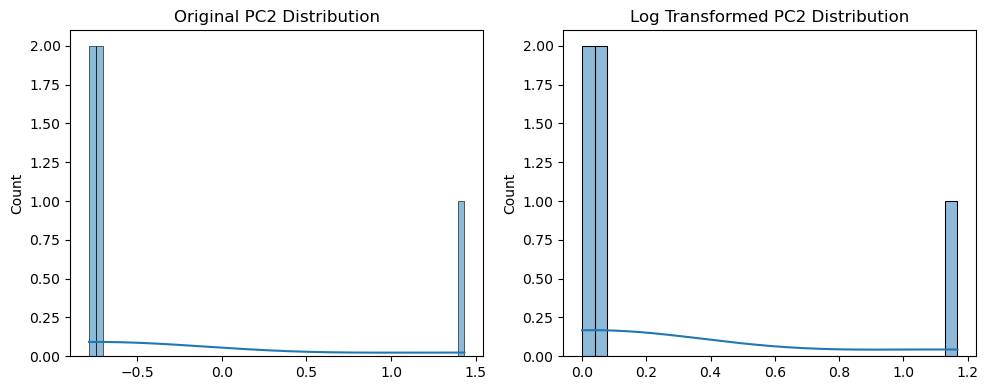

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Sample PCA component (replace with your actual PC2 data)
pc2 = np.array ([1.432680, -0.731709, -0.783595, -0.731709, -0.767128])

# Add a constant to shift data (handling negative values)
c = abs(min(pc2)) + 1  # Ensures all values are positive
pc2_transformed = np.log(pc2 + c)

# Perform Shapiro-Wilk Test
shapiro_original = shapiro(pc2)
shapiro_transformed = shapiro(pc2_transformed)

# Print Shapiro-Wilk test results
print(f"Shapiro-Wilk Test (Original PC2): W={shapiro_original.statistic:.4f}, p-value={shapiro_original.pvalue:.4f}")
print(f"Shapiro-Wilk Test (Log Transformed PC2): W={shapiro_transformed.statistic:.4f}, p-value={shapiro_transformed.pvalue:.4f}")

# Plot original vs transformed data
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(pc2, kde=True, ax=axes[0])
axes[0].set_title("Original PC2 Distribution")

sns.histplot(pc2_transformed, kde=True, ax=axes[1])
axes[1].set_title("Log Transformed PC2 Distribution")

plt.tight_layout()
plt.show()

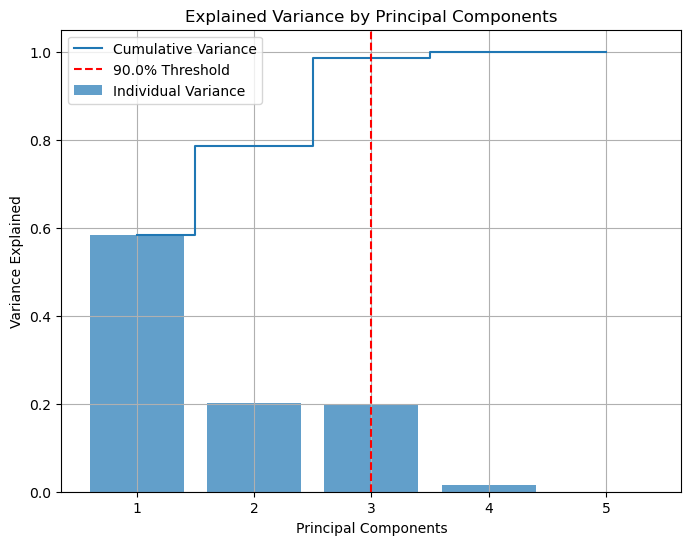


Number of Principal Components Selected (Explaining 90.0% Variance): 3
PCA Transformed Data (First 5 Rows):
   Principal Component 1  Principal Component 2  Principal Component 3
0               1.538413               1.092134              -0.060316
1              -0.764082              -0.869716              -1.257419
2               1.762373              -0.852501               0.428559
3              -0.764082              -0.869716              -1.257419
4              -0.684541              -0.557114               0.203356

Explained Variance Ratio:
Principal Component 1: 58.25%
Principal Component 2: 20.24%
Principal Component 3: 19.98%
Principal Component 4: 1.52%
Principal Component 5: 0.00%


In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
file_path = 'C:/Users/Govin Nagore/Documents/Cleaned_Data.csv'
data = pd.read_csv(file_path)

# Selecting numerical columns for PCA
numerical_columns = ['Qty', 'Tax', 'total_amt', 'Rate', 'Age']
numerical_data = data[numerical_columns]

# Step 1: Standardizing the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical_data)

# Step 2: Applying PCA
pca = PCA()
pca_transformed_data = pca.fit_transform(standardized_data)

# Step 3: Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Step 4: Define a threshold for explained variance (e.g., 90%)
threshold = 0.90
n_components = next(i for i, total_var in enumerate(cumulative_variance) if total_var >= threshold) + 1

# Step 5: Creating a DataFrame for the selected PCA-transformed data
pca_df = pd.DataFrame(
    pca_transformed_data[:, :n_components],
    columns=[f"Principal Component {i+1}" for i in range(n_components)]
)

# Step 6: Plotting Explained Variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Individual Variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative Variance')
plt.axvline(x=n_components, color='r', linestyle='--', label=f'{threshold*100}% Threshold')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid()
plt.show()

# Displaying the transformed data and explained variance
print(f"\nNumber of Principal Components Selected (Explaining {threshold*100}% Variance): {n_components}")
print("PCA Transformed Data (First 5 Rows):")
print(pca_df.head())

print("\nExplained Variance Ratio:") 
for i, var in enumerate(explained_variance_ratio, 1):
    print(f"Principal Component {i}: {var:.2%}")

NameError: name 'data_transformed' is not defined

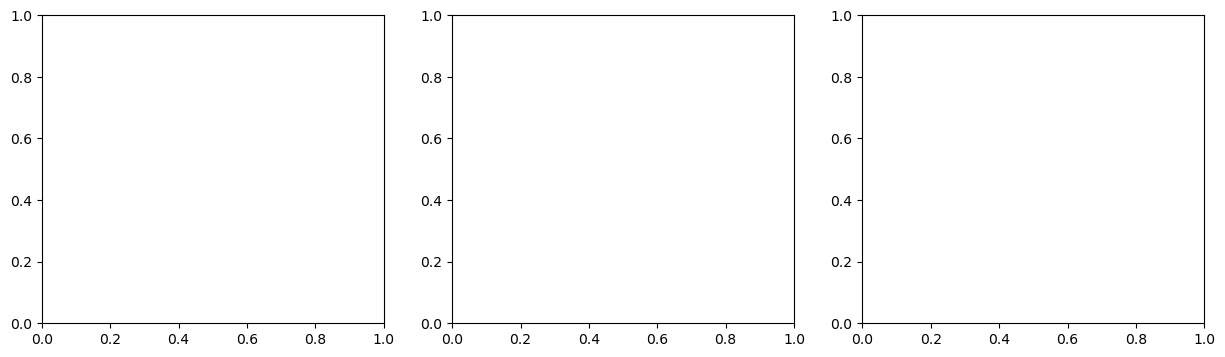

In [7]:
from scipy.stats import shapiro, norm

# Plot histograms with normal distribution curve
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, col in enumerate(data_transformed.columns):
    sns.histplot(data_transformed[col], ax=axes[i], kde=True, color='skyblue')
    
    # Overlay the normal distribution curve
    mean, std = data_transformed[col].mean(), data_transformed[col].std()
    x_vals = np.linspace(data_transformed[col].min(), data_transformed[col].max(), 100)
    axes[i].plot(x_vals, norm.pdf(x_vals, mean, std) * len(data_transformed[col]) * (x_vals[1] - x_vals[0]),
                  color='orange', lw=2, label="Normal Distribution")
    axes[i].legend()
    axes[i].set_title(f'{col}: Histogram with Normal Fit')
plt.tight_layout()
plt.show()

# Print Shapiro-Wilk results and highlight normality status
for col in data_transformed.columns:
    stat, p = shapiro(data_transformed[col])
    result = "Normal" if p > 0.05 else "Not Normal"
    print(f'Shapiro-Wilk Test for {col}: Statistics={stat:.3f}, p-value={p:.3f} => {result}')
